Αναγνώριση Προτύπων - 9ο Εξάμηνο Καφίρης Αλέξανδρος, 03114044 Ζαράνης Εμμανουήλ, 03114798

1η Σειρά Προγραμματιστικών Ασκήσεων

Σκοπός αυτής της εργασίας είναι η κατασκευή ενός μοντέλου που θα μπορεί να ταξινομεί δεκαδικά ψηφία (από το 0 μέχρι το 9) στις αντίστοιχες κατηγορίες τους, με άλλα λόγια θέλουμε να φτιάξουμε έναν μοντέλο που θα αναγνωρίζει το ψηφίο που του δόθηκε.
Το dataset που μας δόθηκε χωρίζεται σε 2 μέρη, ένα training set και ένα test set. Κρίνοντας από τα μεγέθη των αρχείων μπορούμε να υποθέσουμε ότι το training set αποτελεί το 77% των συνολικών δεδομένων μας, ενώ το test set το 23%. Η σημαντική αυτή διαφορά στα μεγέθη των test και train δεδομένων πηγάζει από την ανάγκη μας να φτιάξουμε ένα γενικό μοντέλο που θα δίνει καλές ταξινομήσεις για νέα ψηφία. Στην περίπτωση που τα training δεδομένα ήταν περισσότερα θα αντιμετωπίζαμε πρόβλημα overfitting, ενώ σε αντόθετη περίπτωση underfitting. Και οι δύο παραπάνω καταστάσεις είναι ανεπιθύμητες αφού σε αυτές το μοντέλο μας είτε δεν μπορεί να εκπαιδευτεί επαρκώς, είτε εκπαιδεύεται πολύ καλα στα training δεδομένα και δεν μπορεί να γενικεύσει τις εκτιμήσεις του σε νέα.
Στη συνέχεια παρουσιάζουμε τα βήματα που ακολουθούμε για την επίλυση του προβλήματος ακολουθώντας τα βήματα που δίνονται στην εκφώνηση της προπαρασκευαστικής άσκησης ώστε να είναι να σαφές το τί κάνουμε κάθε φορά και να παρατίθενται τα ανάλογα σχόλια επί των αποτελεσματων.

Βήμα 1: Φόρτωση και διαχωρισμός των δεδομένων.

In [2]:
import numpy as np #import numpy library in order to be compatible with scikit-learn

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read the train.txt file
with open("dataset/train.txt") as train_set:
    X_train = []
    y_train = []
    for line in train_set.readlines():
        split_line = line.split() # split numbers
        
        buffer = []
        for number in split_line:
            buffer.append(float(number)) # typecast every sting to float
        
        digit = int(buffer[0]) # keep first digit as int which is the label
        rest = buffer[1:] # keep rest as description
        
        X_train.append([rest]) # append to list of lists of descriptions
        y_train.append(digit) # append to list of labels

# Same happens for test.txt file
with open("dataset/test.txt") as test_set:
    X_test = []
    y_test = []
    for line in test_set.readlines():
        split_line = line.split()
        
        buffer = []
        for number in split_line:
            buffer.append(float(number))
        
        digit = int(buffer[0])
        rest = buffer[1:]
        
        X_test.append([rest])
        y_test.append(digit)
        
# Transform created list to numpy arrays.
X_test = np.asarray(X_test).squeeze()
y_test = np.asarray(y_test)
X_train = np.asarray(X_train).squeeze()
y_train = np.asarray(y_train)

Θα εξετάσουμε αν οι μετατροπές έχουν γίνει σωστά και αν τα μεγέθη των πινάκων είναι σωστα:

In [2]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7291, 256) (7291,)
(2007, 256) (2007,)


In [3]:
digit_131_l = y_train[131] # read 131th label
digit_131_descr = X_train[131,:] # read 131th array
digit_131 = digit_131_descr.reshape([16,16])
import matplotlib.pyplot as plt # import matplotlib.pyplot in order to show image
plt.imshow(digit_131,cmap='gray')
plt.show()

print('Actual number: ',digit_131_l)

<Figure size 640x480 with 1 Axes>

Actual number:  9


Πράγματι βλέπουμε τον αριθμό 9, όπως υποδεικνύεται και από το label.

Βημα 3: Σχεδιασμός 1 τυχαίου δείγματος για κάθε label

Για να απεικονίσουμε 1 τυχαίο δείγμα από κάθε label θα ομαδοποιήσουμε τα δείγματα σε labels. Αυτό μπορεί να μην είναι απαραίτητο εδώ, ωστόσο η ομαδοποίηση θα μας εξυπηρετήσει και στα επόμενα ερωτήματα.
    

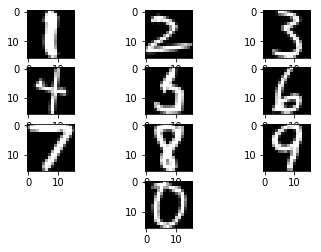

In [4]:
# Create plots of each number
from random import randint # import randint to choose random elements from arrays

fig = plt.figure() # create figure
for digit in np.unique(y_train):
    
    indexes = np.where(y_train == digit)[0] # locate the indexes of that digit
    random_pick = np.random.choice(indexes) # pick a random index
    chosen_digit = X_train[random_pick,:] # pick the sample with the random index
    
    # plot random digits in a nice way
    digit = np.asscalar(digit)
    if digit != 0:
        fig.add_subplot(4,3,digit)
        plt.imshow(chosen_digit.reshape([16,16]),cmap='gray')
    else:
        fig.add_subplot(4,3,11)
        plt.imshow(chosen_digit.reshape([16,16]),cmap='gray')

Βήμα 4: Υπολογίζουμε τη μέση τιμή των χαρακτηριστικών του pixel(10,10) για το ψηφίο 0 με βάση το train set

Θα κατασκευάσουμε μια συνάρτηση που εκτελεί αυτή την πράξη διότι θα μας χρησιμέψει και στη συνέχεια.

In [5]:
# This function calculates the mean of a pixel along a number of digits.
def mean_of_pixel(x,
                  y,
                  data,
                  labels,
                  value):
    pixel_no = 16*y + x # find the feature number
    values_index = np.where(labels == value) # locate the indexes for the desired value
    return np.mean(data[values_index,pixel_no]) # return the mean for all the instances of the sample
    
mean_of_pixel(10,10,X_train,y_train,0)

-0.5041884422110553

Βήμα 5: Υπολογίζουμε τη διασπορά των χαρακτηριστικών του pixel(10,10) για το ψηφίο 0 με βάση το train set.

Όπως και πριν θα κατασκευάσουμε μια παρόμοια συνάρτηση.

In [6]:
# This function calculates the variance of a pixel along a number of digits.
def var_of_pixel(x,
                 y,
                 data,
                 labels,
                 value):
    pixel_no = 16*y + x # find the feature number
    values_index = np.where(labels == value) # locate the indexes for the desired value
    return np.var(data[values_index,pixel_no]) # return the variance for all the instances of the sample
    
var_of_pixel(10,10,X_train,y_train,0)

0.5245221428814929

Βήμα 6,7,8: Εκτελούμε τις παραπάνω πράξεις για κάθε pixel του ψηφίου 0 και τυπώνουμε τις μέσες τιμές και τις διασπορές σαν εικόνες.

Κι εδώ μπορούμε να κατασκευάσουμε μια συνάρτηση που θα κάνει τον συνολικό υπολογισμό για κάποιο ψηφίο.

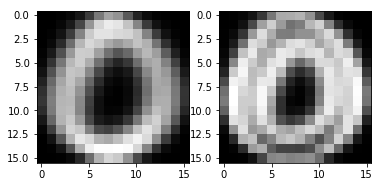

In [7]:
# This function calculates mean and variance of each pixel for a digit and returns 2 np.ndarrays respectively.
def stats_for_label(label,
                    X_train,
                    y_train):
    
    indexes = np.where(y_train == label) # pick the indexes of the label
    mean_of_label = np.mean(X_train[indexes,:].squeeze(),axis=0) # calculate the mean of samples with that label
    var_of_label = np.var(X_train[indexes,:].squeeze(),axis=0) # calculate the variance of samples with that label
    return mean_of_label, var_of_label

if __name__ == '__main__':
    mean_0,var_0 = stats_for_label(0,X_train,y_train)
    # Make figures for mean and variance of 0
    fig = plt.figure()
    fig.add_subplot(121)
    plt.imshow(mean_0.reshape([16,16]),cmap = 'gray')
    fig.add_subplot(122)
    plt.imshow(var_0.reshape([16,16]),cmap = 'gray')

Παρατηρούμε ότι και οι δύο απεικονίσεις του ψηφίου 0, είτε της μέσης τιμής, είτε της διασποράς, αναπαριστούν πράγματι το ψηφίο. Αυτό που μπορούμε να προσθέσουμε στο σχολιασμό μας είναι ότι η απεικόνιση της μέσης τιμής προκαλεί ένα θόλωμα στο ψηφίο, ενώ η απεικόνιση της διασποράς μια ενίσχυση των περιγραμμάτων. Αυτό μπορεί να εξηγηθεί από το γεγονός ότι η θέση του κορμού ψηφίου είναι περίπου σταθερή (όσον αφορά τη μέση τιμή), ενώ τα όριά του είναι αυτά που διαφοροποιούνται αναλόγως τον γραφέα του.

Βήμα 9: Υπολογίζουμε μέση τιμή και διασπορά για όλα τα ψηφία και σχεδιάζουμε τις μέσες τιμές τους.

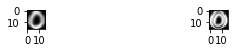

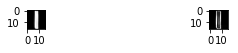

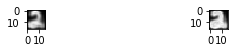

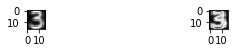

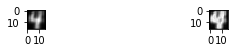

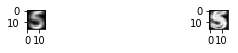

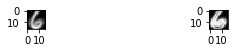

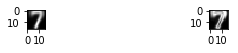

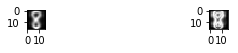

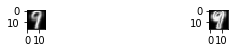

In [8]:
for label in np.unique(y_train):
    
    d_mean, d_var = stats_for_label(label,X_train,y_train)
    
    fig = plt.figure()
    # Plot each digit's mean and variance
    fig.add_subplot(10,2,2*digit+1)
    plt.imshow(d_mean.reshape([16,16]),cmap='gray')
    
    fig.add_subplot(10,2,2*digit+2)
    plt.imshow(d_var.reshape([16,16]),cmap='gray')

Εδώ μπορούμε να εξάγουμε το ίδιο συμπέρασμα για κάθε ψηφίο, όπως αυτό από το Βήμα 8.

Βήμα 10: Ταξινόμηση του ψηφίου 101 με βάση την Ευκλείδια απόσταση.

In [9]:
# Here we need to create an array with the mean of each digit.
means = np.asarray([stats_for_label(label,X_train,y_train)[0] for label in np.unique(y_train)])

# Create a function that calculates the Eucleidian distance of a digit from each mean of digit
def eucleidian_distance(digit, mean_of_digits):
    eucl_dist = np.empty((10,1)) # array of differences
    for i in range(10):
        # Calculate the eucleidian difference between each train digit with the mean of each digit
        diffs_dim = digit - mean_of_digits[i]
        diffs_dim = np.power(diffs_dim,2)
        eucl_dist[i] = np.sqrt(np.sum(diffs_dim))
    else:
        return eucl_dist

# This function finds the best eucleidian distance of a point and the mean array
def classify_digit_eucl(digit, mean_of_digits):
    distances = eucleidian_distance(digit,mean_of_digits)
    return np.argmin(distances) # return the index of the minimum distance

Τώρα θα χρησιμοποιήσουμε τον πίνακα των αποστάσεων για να ταξινομήσουμε το δείγμα 101

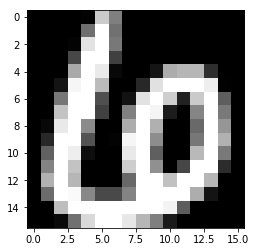

Actual digit (see above) and the prediction is: 0


In [10]:
digit_101 = X_test[101,:] # take digit with index 101
# Show the image of the digit and the result
plt.imshow(digit_101.reshape([16,16]),cmap='gray')
plt.show()
print('Actual digit (see above) and the prediction is:',classify_digit_eucl(digit_101,means)) # find the best fitting number

Σε αυτή την περίπτωση η ταξινόμηση δεν έχει γίνει με επιτυχία. Αυτό που ίσως φταίει είναι το ότι το 6 είναι πλάγια και ακολουθεί τη γραμμή του 0, οπότε ο ταξινομητής μας δεν έχει καλή απόδοση.

Βήμα 11: Ταξινόμηση όλων των ψηφίων του test set και εκτίμηση ποσοστού επιτυχίας.

In [11]:
from sklearn.metrics import zero_one_loss

# Classify each sample in test set.
test_predictions = [classify_digit_eucl(test_digit,means) for test_digit in X_test.tolist()]

# Check for accuracy.
test_accuracy = zero_one_loss(y_test,test_predictions)
print('Accuracy of our classifier: ',1 - test_accuracy)

Accuracy of our classifier:  0.8141504733432985


Βήμα 12: Κατασκευή ταξινομητή με βάση την ευκλείδια απόσταση.

In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create the eucleidian classifier class
class Eucleidian_classifier(BaseEstimator,ClassifierMixin):
    
    def __init__(self):
        self.X_mean = None
        
    def fit(self,X_train,y_train):
        # Create array with means of index
        dims = (aux_x,aux_y) = (y_train.shape[0],X_train.shape[1])
        
        self.X_mean = np.empty(dims)
        min_index, max_index = np.min(y_train),np.max(y_train) # find min and max digits number
        values = np.unique(y_train)
        
        for i in range(min_index,max_index + 1):
            self.X_mean[i,:] = np.mean(X_train[np.argwhere((y_train - values[i] == 0)).squeeze()],
                                      axis = 0) # calculate the mean for each digit
        
    def predict(self,X_test):
        
        # We classify each sample based on the eucleidian classifier we created before
        return np.asarray([classify_digit_eucl(sample,self.X_mean) for sample in X_test])
    
    def score(self,X_test,y_test):
        
        results = self.predict(X_test)# make a list for each prediction made
        flags = y_test - results # subtruct from label array to find the correct predictions (those with zero)
        correct = np.count_nonzero(flags == 0) # count the correct predictions
        return correct / y_test.shape[0]

Βήμα 13: Υλοποίηση 5-fold cross validation.

In [13]:
from sklearn.model_selection import cross_val_score

# Use scikit fnction cross_val_score to calculate cross validation scores.
nfold_scores = cross_val_score(Eucleidian_classifier(),
                            X_train,
                            y_train,
                            scoring='accuracy',
                            cv = 5)
print('5-fold cross validation scores: ',nfold_scores)

5-fold cross validation scores:  [0.85772914 0.84041096 0.84567901 0.85518188 0.8431912 ]


Βήμα 13β: Σε αυτο το βήμα σχεδιάζουμε την περιοχή απόφασης του ταξινομητή, εφαρμόζοντας πρώτα pca έτσι ώστε να σχηματίσουμε 2 principal complonents. Παρακάτω φαίνεται η κατανομή των δειγμάτων (train set) μετά την εφαρμογή του pca.

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import rainbow

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

pca = PCA(n_components=2)

pca_fitted = pca.fit(X_train)
reduced_train = pca_fitted.transform(X_train)



fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9]


colors = ['black','blue','fuchsia','grey','cyan','red','yellow','salmon','sienna','tan']

for target,color in zip(targets,colors):
    
    indexes = np.where(y_train==target)[0]

    principal_comp_1=  reduced_train[indexes][:,0]
    principal_comp_2=  reduced_train[indexes][:,1]
    ax.scatter( principal_comp_1, principal_comp_2, c = color, s = 50)
    
ax.legend(targets)
ax.grid()


NameError: name 'X_train' is not defined

In [15]:
from matplotlib.cm import rainbow
    
    
def plot_clf(clf, X, y, labels,title_plot):
    fig, ax = plt.subplots()
    # title for the plots
    title = title_plot
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1

    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    
    colors = rainbow(np.linspace(0, 1, len(labels)))

    for target,color in zip(targets,colors):
        
        ax.scatter(X0[y == target], X1[y == target],c=color, label=target,s=50, alpha=0.9, edgecolors='k')
     
    ax.set_ylabel('Principal Component 1')
    ax.set_xlabel('Principal Component 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()


Παρακάτω σχεδιάζουμε την περιοχή απόφασης χρησιμοποιώντας τα test δεδομένα.
Με την χρήση 2 principal components είναι λογικό το classification να απέχει από εκείνο με την χρήση όλων των features. Ωστόσο, βλέπουμε ότι γίνεται μια διάκριση μεταξύ ψηφίων που διαφέρουν αρκετά, ενώ αλλα που μοιάζουν αρκετά πέφτουν στην ίδια περιοχή απόφασης(πχ 3,4,5).
Σχεδιάζουμε τόσο την περιοχή απόφασης μόνη της, όσο και με τα στοιχεία που προκύπτουν από το PCA.

0.5161933233682112


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

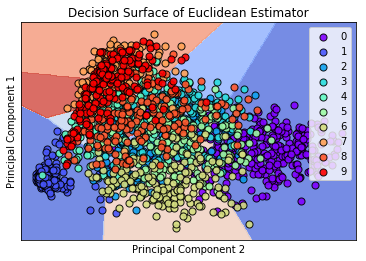

In [16]:
# firstly we trasform test set!!
reduced_test=pca_fitted.transform(X_test)


euc = Eucleidian_classifier()
euc.fit(reduced_train,y_train)
euc.predict(reduced_test)
print(euc.score(reduced_test,y_test))

plot_clf(euc,reduced_test,y_test,targets,'Decision Surface of Euclidean Estimator')

Βήμα 13γ:
Παρακάτω σχεδιάζουμε την καμπύλη εκμάθησης του ευκλείδιου ταξινομητή.
Παρατηρούμε ότι μετά από περίπου 4000 δείγματα τα Training και Cross-validation scores σχεδόν ταυτίζονται. Αυτό δείχνει ότι δεν απαιτούνται παραπάνω δείγματα για την εκπαίδευση του μοντέλου μας (εν γένει με παραπάνω δείγματα θα πετυχαίναμε παρόμοιο αποτέλεσμα).
Μάλιστα, αυτό συμβαίνει διότι το μοντέλο μας δεν περιέχει υπερπαραμέτρους οι οποιές πρέπει να "εκπαιδευτούν". Έτσι λοιπόν το learning curve είναι σχεδόν ευθεία.

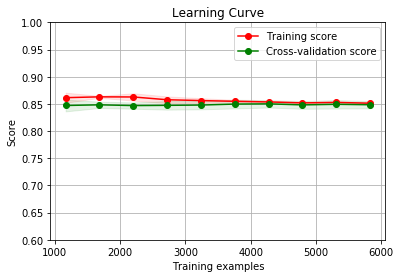

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    Eucleidian_classifier(), X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.2, 1.0, 10))

def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.6, 1))

Βήμα 14: Υπολογισμός a priori πιθανοτήτας για κάθε κατηγορία.

A priori probabilities of each class:
Value |  Frequency
0     |  0.164
1     |  0.138
2     |  0.1
3     |  0.09
4     |  0.089
5     |  0.076
6     |  0.091
7     |  0.088
8     |  0.074
9     |  0.088
Sum of frequencies is: 1.0


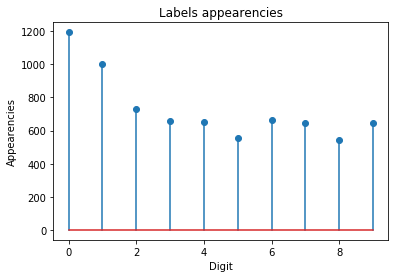

In [18]:
# Given the labels part of the dataset, calculate the a priori probabilites.
def a_priori_calc(labels,
                  visualize = True):
    
    unique_labels = np.unique(labels) # locate the different labels
    bin_count = np.bincount(labels) # count each label appearences
    
    if visualize:
        plt.xlabel('Digit')
        plt.ylabel('Appearencies')
        plt.title('Labels appearencies')
        plt.stem(range(10),bin_count)

    return unique_labels,bin_count / labels.shape
    
if __name__ == "__main__":
    val, a_priori = a_priori_calc(y_train)
    print('A priori probabilities of each class:')
    print('=====================================')
    print('Value |  Frequency')
    for value,freq in zip(val,a_priori):
        print('{}     |  {}'.format(value,round(freq,3)))
    else:
        print('=====================================')
        print('Sum of frequencies is: {}'.format(sum(a_priori)))

Βήματα 15,16: Κατασκευή Gaussian Naive Bayes classifier,τρέξιμο με var=1 και σύγκριση με GNB from scikit.

Παρατηρήσαμε ότι κατά τον υπολογισμό της aposteriory πιθανότητας κάποιες τιμές του variance είναι μηδενικές με αποτέλεσμα να μην μπορεί να υπολογιστεί η πιθανότητα που δίνει η Gaussian κατανομή. Έτσι λοιπόν στην πρώτη υλοποίηση αγνοήσαμε την ύπαρξη αυτής της πιθανότητας στο γινόμενο πιθανοτήτων για την πρόβλεψη με χρήση maximum likelihood.

Στην συνέχεια σκεφτήκαμε να λάβουμε υπόψιν και αυτά τα features στον υπολογισμό της πιθανότητας , εισάγωντας θόρυβο στο αρχικό dataset με σκοπό να αλλάξει το variance και να μην αποκτήσει μηδενική τιμή. Έτσι λοιπόν καταφέραμε και πετύχαμε καλύτερο αποτέλεσμα στον ταξινομητή.


Gaussian Naive Bayes Classifier:

In [19]:
import math
# Create the Gaussian Naive Bayes classifier class
class Gaussian_Naive_Bayes_classifier(BaseEstimator,ClassifierMixin):
    
    
    def __init__(self):
        self.X_mean = None
        self.X_var = None
        self.a_priory = None
        
        
    def fit(self,X_train,y_train,var=None):
        #Find all different labels (digits)
        self.labels_values = np.unique(y_train)
        
        dims = (aux_x,aux_y) = (self.labels_values.shape[0],X_train.shape[1])
        
        #computing mean and var for every feature (xi) according to its class (y)
        # this computation may not be right! shall we compute mean and var for each class with MLE??
        self.X_mean = np.empty(dims)
        self.X_var = np.empty(dims)
        
        for label in self.labels_values:
            d_mean, d_var = stats_for_label(label,X_train,y_train)
            self.X_mean[label] = d_mean
            self.X_var[label] = d_var
            #self.X_var[label] = np.ones(dims[1])
        
        if var is not None:
            self.X_var[:]=var
        
        temp,self.a_priory = a_priori_calc(y_train,visualize=False)
    
    def computation_of_gaussian_prop(self,sample,mean,var):
        
        # Sos we give as argument the var and not the std!!
        temp1 = ((-1) * np.power((sample - mean),2) / ( 2 * var ))
        temp2 = np.exp( temp1 )
        temp3 = 1 / np.sqrt( 2* math.pi* var )
        
        return temp3*temp2   
    
    
    def makeprediction(self,sample,mean_of_every_label,var_of_every_label,labels):
        
        propabilities = np.empty(labels.shape[0])
        
        for label in labels:
            #compute the product of P(xi|y) for i=1..n
            props = self.computation_of_gaussian_prop(sample,mean_of_every_label[label],var_of_every_label[label])
            product=1
            for x in props:
                if math.isnan(x)==False:
                    product = x*product
            
            propabilities[label] = product * self.a_priory[label]
            
        return np.argmax(propabilities)
    
    
    def predict(self,X_test):
        
        number_of_samples, number_of_features = X_test.shape
        
        #now for each sample lets make a prediction!
        pred = np.empty(number_of_samples)
        
        counter=0
        
        for sample in X_test:
            pred[counter] = self.makeprediction(sample,self.X_mean,self.X_var,self.labels_values)
            counter += 1
            
            
        return pred.astype(np.int64)
    
    
    def score(self,X_test,y_test):
        
        results = self.predict(X_test)# make a list for each prediction made
        flags = y_test - results # subtruct from label array to find the correct predictions (those with zero)
        correct = np.count_nonzero(flags == 0) # count the correct predictions
        return correct / y_test.shape[0]

In [20]:
gnb1 = Gaussian_Naive_Bayes_classifier()

print('Accuracy of Bayes classifier')
print('============================')
gnb1.fit(X_train,y_train)
print('Score: {}%'.format(round(gnb1.score(X_test,y_test)*100,2)))
gnb1.fit(X_train,y_train,1)
print('Score with Variance = 1: {}%'.format(round(gnb1.score(X_test,y_test)*100,2)))

Accuracy of Bayes classifier
Score: 77.48%
Score with Variance = 1: 81.27%


In [21]:
def add_noise(data,mean = 0,std = 0.1):

    noisy_data = []
    for sample in data[:]:

        # Add noise so variance is not zero
        noise = np.random.normal(mean,std,sample.shape[0])
        noisy_data.append(sample + noise)
    else:
        return np.asarray(noisy_data)

In [22]:
#concatenate data
alldata = np.concatenate((X_train,X_test),axis=0)

#add noise on data
noisy=add_noise(alldata)

#split data again to train and test
noisy_train= noisy[0:X_train.shape[0]][:]
noisy_test= noisy[X_train.shape[0]:][:]


print('Accuracy of Bayes classifier with adding noise on dataset!')
print('============================')
gnb1.fit(noisy_train,y_train)
print('Score: {}%'.format(round(gnb1.score(noisy_test,y_test)*100,2)))


Accuracy of Bayes classifier with adding noise on dataset!
Score: 80.47%


Στην συνέχεια χρησιμοποιούμε τον Gaussian Naive Bayes Classifier του scikit learn.

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb_sci = GaussianNB()

print('Accuracy of scikit Bayes classifier (NO noise in dataset)')
print('===================================')
gnb_sci.fit(X_train,y_train)
print('Accuracy: {}% \n'.format(round(gnb_sci.score(X_test,y_test)*100,2)))

print('Accuracy of scikit Bayes classifier ( noise in dataset)')
print('===================================')
gnb_sci.fit(noisy_train,y_train)
print('Accuracy: {}%'.format(round(gnb_sci.score(noisy_test,y_test)*100,2)))

Accuracy of scikit Bayes classifier (NO noise in dataset)
Accuracy: 71.95% 

Accuracy of scikit Bayes classifier ( noise in dataset)
Accuracy: 80.47%


Παρατηρούμε ότι χωρίς την εισαγωγή θορύβου έχουμε πετύχει ένα καλύτερο αποτέλεσμα από την υλοποίηση του scikit. Ωστόσο, αν βάλουμε θόρυβο τα αποτελέσματα είναι ίδια.


Βήμα 17: Στην συνέχεια ομαδοποιούμε διάφορους classifiers και τους τρέχουμε με διαφορετικά kernels.

In [24]:
# lets use some naive bayes classifiers from scikit...
from sklearn.naive_bayes import BernoulliNB

models = [GaussianNB(),BernoulliNB()]

models = (clf.fit(X_train, y_train) for clf in models)

titles = ('GaussianNB:','BernoulliNB:')

for clf, title in zip(models, titles):
    clf.predict(X_test)
    print(title)
    print(clf.score(X_test,y_test))

GaussianNB:
0.7194818136522172
BernoulliNB:
0.8251121076233184


In [25]:
#lets now try knn...with different number of neighbors.
from sklearn.neighbors import KNeighborsClassifier

def knn_tester(X_train,
                       y_train,
                       X_test,
                       y_test):
    
    
    neighbors = [1,3,5,9,11,17]
    knnscores = []
    
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors = k,n_jobs = -1)
        knn.fit(X_train,y_train)
        knnscores.append(knn.score(X_test,y_test))
    else:
        return knnscores,neighbors

# Function to plot time series
def plot_t_series(x,
                  y):
    
    plt.title('kNN implementation results')
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.plot(x,y)
    plt.show()

([0.9436970602889886, 0.9446935724962631, 0.9446935724962631, 0.9372197309417041, 0.9312406576980568, 0.9257598405580468], [1, 3, 5, 9, 11, 17])


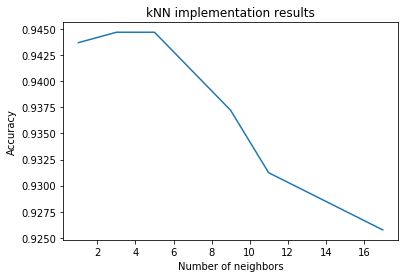

In [26]:
print(knn_tester(X_train,y_train,X_test,y_test))
scores, neighbors = knn_tester(X_train,y_train,X_test,y_test)
plot_t_series(neighbors,scores)

Παρατηρούμε ότι για κ=3,5 πετυχαίνουμε το καλύτερο accuracy.

Ωστόσο αυτός ο τρόπος δεν είναι τόσο φαίνεται να μην είναι τόσο αντιπροσωπευτικός...
Παρακάτω ελέγξαμε ποιος είναι ο βέλτιστος αριθμός γειτόνων χρησιμοποιώντας 7 fold cross-validation με στόχο την ελαχιστοποίηση του MSE,δίνοντας τελικά σαν αποτέλεσμα 1.
Επειδή ο χρόνος εκτέλεσης είναι αρκετά μεγάλος βάλαμε αυτό το κομμάτι κώδικα σε σχόλια.

In [27]:
"""
#lets pick all odds neighbors from 1 to 50..
myList = list(range(1,15))

# subsetting just the odd ones
neighbors = [x for x in myList if(x%2!=0)]

# empty list that will hold cv scores
cv_scores = []

# perform 7-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(k)
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
"""

'\n#lets pick all odds neighbors from 1 to 50..\nmyList = list(range(1,15))\n\n# subsetting just the odd ones\nneighbors = [x for x in myList if(x%2!=0)]\n\n# empty list that will hold cv scores\ncv_scores = []\n\n# perform 7-fold cross validation\nfor k in neighbors:\n    knn = KNeighborsClassifier(n_neighbors=k)\n    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring=\'accuracy\')\n    cv_scores.append(scores.mean())\n    print(k)\n# changing to misclassification error\nMSE = [1 - x for x in cv_scores]\n\n# determining best k\noptimal_k = neighbors[MSE.index(min(MSE))]\nprint ("The optimal number of neighbors is %d" % optimal_k)\n\n# plot misclassification error vs k\nplt.plot(neighbors, MSE)\nplt.xlabel(\'Number of Neighbors K\')\nplt.ylabel(\'Misclassification Error\')\nplt.show()\n'

Παρακάτω δοκιμάσαμε μερικά svm μοντέλα με διαφορετικά kernels..
Σύμφωνα με τα αποτελέσματα καλύτερα φάνηκε να είναι εκείνο με το πολυωνυμικό.

In [28]:
#now lets try some svm models..
from sklearn import svm

# edw tha valw merikous akoma...    
models = [svm.SVC(kernel='poly'),svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),svm.SVC(kernel='sigmoid'),
          svm.LinearSVC(multi_class='crammer_singer',max_iter=5000)]
  
for model in models:
    mysvm = model
    mysvm.fit(X_train,y_train)
    print(str(model)+":")
    print(mysvm.score(X_test,y_test))
    print("=========================")

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False):
0.9466865969108121
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False):
0.9262580966616841
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False):
0.9422022919780767
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, ver

Βήμα 18: Σε αυτό το βήμα χρησιμοποιούμε τον voting classifier του scikit για επιτύχουμε υψηλότερη επίδοση από τους επιμέρους classifiers.

Παρακάτω χρησιμοποιούμε hard voting...

In [29]:
from sklearn.ensemble import VotingClassifier 

gnb1 = Gaussian_Naive_Bayes_classifier()
bnb = BernoulliNB()
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs = -1)

svm_poly = svm.SVC(kernel='poly',probability=True)
svm_lin = svm.SVC(kernel='linear',probability=True)
svm_rbf = svm.SVC(kernel='rbf',probability=True)


In [30]:
eclf1 = VotingClassifier(estimators=[ ('KNN', knn),('SVM_poly', svm_poly),('Svm_lin',svm_lin)], voting='hard')
eclf1=eclf1.fit(X_train, y_train)
print(eclf1.score(X_test,y_test))

0.9491778774289985


In [31]:
eclf2 = VotingClassifier(estimators=[ ('KNN', knn),('SVM_poly', svm_poly),('Svm_lin',svm_lin)], voting='soft',weights=[1,1.2,1.1])
eclf2 = eclf2.fit(X_train, y_train)
print(eclf2.score(X_test,y_test))



0.9496761335326358


Παρατηρούμε οτι και με τις δύο τεχνικές voting πετυχαίνουμε καλύτερο αποτέλεσμα. Ωστόσο, η διαφορά δεν είναι πολύ μεγάλη.Αυτό συμβαίνει γιατί οι classifiers κάνουν σχεδόν τα ίδια λάθη και αν κάποιος είναι καλύτερος οφείλεται στο ότι δεν κάνει κάποια απο αυτά. Δηλαδή αν εμφανίζαμε τα ποσοστ;ά των λαθών σε κάθε ψηφίο θα βλέπαμε οτι δεν υπάρχουν classifiers με περίπου ίδιο ποσοστά accuracy και διαφορετικά λάθη.

Επίσης πρέπει να προσέξουμε ο αριθμός των classifiers να είναι μονός ώστε να μην υπάρξουν ισοβαθμίες.

Στο επόμενο βήμα χρησιμοποιούμε τον Bagging Classifier για να δημιουργήσουμε ενα ensemble.

In [32]:

from sklearn.ensemble import BaggingClassifier
eclf3 = VotingClassifier(estimators=[('Ber',bnb),('SVM_poly', svm_poly),('Svm_lin',svm_lin)], voting='soft',weights=[1,1.2,1.1])
ensemble = BaggingClassifier(base_estimator=eclf3)
print( ensemble.fit(X_train,y_train).score(X_test,y_test))

0.9302441454907823


Στο παρακάτω βήμα υλοποιούμε έναν data loader για το dataset μας. Έτσι εισάγοντας το αρχείο με τα δεδομένα μπορούμε να το φορτώσουμε έχοντας τα features σε tensors.

Επίσης υλοποιήσαμε την κλάση Data_splitter η οποία μπορεί να χρησιμοποιηθεί για split του dataset.(Τα sets που γυρνάει είναι τύπου Subset συμβατά με την class Dataset του Pytorch).

O Data_splitter χρησιμοποιήθηκε για χωρισμό του training set σε train set(80%) και validation set(20%).

In [33]:
from torch.utils.data import Dataset
import numpy as np
import os
import torch

class DigitsLoader(Dataset):
    
    def __init__(self,
                 filename,
                 path,
                 trans= None):
        
        self.trans = trans
        
        # Read set of data
        join_path = os.path.join(path,filename)
        with open(join_path) as train_set:
            X = []
            y = []
            for line in train_set.readlines():
                split_line = line.split() # split numbers

                buffer = []
                for number in split_line:
                    buffer.append(float(number)) # typecast every sting to float

                digit = int(buffer[0]) # keep first digit as int which is the label
                rest = buffer[1:] # keep rest as description

                X.append([rest]) # append to list of lists of descriptions
                y.append(digit) # append to list of labels
        
        X = np.asarray(X).squeeze()
        y = np.asarray(y)
        
        self.samples = list(zip(X,y))
        
        
        
    # Define __len__ and __getitem__
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        if self.trans is not None:
            return self.trans(self.samples[idx])
        else:
            return self.samples[idx]

        
        
from torch._utils import _accumulate
from torch import randperm
import math

class Subset(Dataset):
    """
    Subset of a dataset at specified indices.

    Arguments:
        dataset (Dataset): The whole Dataset
        indices (sequence): Indices in the whole set selected for subset
    """
    def __init__(self, dataset, indices):
        self.dataset = dataset
        self.indices = indices

    def __getitem__(self, idx):
        return self.dataset[self.indices[idx]]

    def __len__(self):
        return len(self.indices)
    
# This class splits dataset  randomly
class Data_splitter:

    
    def random_split(self,dataset, lengths):
        """
        Randomly split a dataset into non-overlapping new datasets of given lengths.

        Arguments:
            dataset (Dataset): Dataset to be split
            lengths (sequence): lengths of splits to be produced
        """
        if sum(lengths) != len(dataset):
            raise ValueError("Sum of input lengths does not equal the length of the input dataset!")

        indices = randperm(sum(lengths))
        #cast to DigitsLoader
        return [Subset(dataset, indices[offset - length:offset]) for offset, length in zip(_accumulate(lengths), lengths)]

    
    def split_perc(self,dataset,percentages):
        dataset_len = len(dataset)
        
        if sum(percentages) != 100:
            raise ValueError("Sum of percentages does not equal 100!")
        lengths=[]
        for counter,percentage in enumerate(percentages):
            if(counter<len(percentages)-1):
                lengths.append( math.floor(percentage/100*dataset_len) )
                
            else:
                mysum = sum(lengths)
                lengths.append(dataset_len-mysum)
        return self.random_split(dataset,lengths)
            

In [34]:
from torchvision import transforms,utils

class ToTensor(object):
    def __init__(self):
          pass
        
    def __call__(self, datum):
        x, y = datum[0], datum[1]
        t = torch.from_numpy(x).type(torch.FloatTensor) 
        t.requires_grad = False
        return t,y

In [35]:
#now load the train set and test set and transform them!!

my_transform = transforms.Compose([ToTensor()])

digits_train = DigitsLoader('train.txt','dataset/', trans=my_transform)
digits_test = DigitsLoader('test.txt','dataset/', trans=my_transform)



labels={}
for counter,(sample,label) in enumerate(digits_train):
    if label not in labels:
        labels[label]=1

features_number = len(digits_train[0][0])
labels_number = len(labels.keys())


#now lets split train data to train set (80%) and validation set (20%)...

splitter = Data_splitter()
[train,val] = splitter.split_perc(digits_train,[80,20])


Στην συνέχεια υλοποιήσαμε 2 τύπους νευρωνικών.
Ο πρώτος είχε 1 hidden layer,ενώ ο δεύτερος 2.
Παρατηρήσαμε ότι το 2ο μοντέλο έδινε καλύτερα αποτελέσματα (γεγονός λογικό αφού είναι πιο σύνθετο) και για αυτό θα είναι εκείνο το οποίο στην συνέχεια θα κάνουμε train και evaluate.
Μάλιστα πειραματηστήκαμε με τα activation functions των νευρώνων, δοκιμάζοντας sigmoid,relu,tanh ακόμα και συνδυασμούς αυτών (όσον αφορά το 2ο μοντέλο), και παρατηρήσαμε ότι η tanh έδινε καλύτερα αποτελέσματα (και η relu αρκετά κοντινά).

In [36]:
import torch.nn as nn
import torch.nn.functional as F

class MyNet_TwoLayers(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(MyNet_TwoLayers, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.Tanh()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out
    
class MyNet_OneLayer(nn.Module):
    
    def __init__(self, input_size, hidden1_size, num_classes):
        
        super(MyNet_OneLayer, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, num_classes)
   
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

Στο επόμενο βήμα χωρίζουμε τα sets σε batches. Παρατηρήσαμε ότι όσο μεγαλύτερο είναι το size τους τόσο πιο γρήγορα γίνεται train το νευρωνικό, δίνοντας όμως χαμηλότερα στατιστικά αποτελέσματα.
Τελικά επιλέγαμε batch size 16.

In [37]:
# Transform to batches...
#For this purpose we will use the DataLoader class of Pytorch
from torch.utils.data import DataLoader

BATCH_SZ=16

train_batches = DataLoader(train,batch_size=BATCH_SZ,shuffle=True,num_workers=4)
val_batches = DataLoader(val,batch_size=BATCH_SZ,shuffle=True,num_workers=4)
test_batches = DataLoader(digits_test,batch_size=BATCH_SZ,shuffle=True,num_workers=4)


Τέλος κάνουμε train το νευρωνικό μας και evaluate στα validation και test sets.

In [38]:
EPOCHS = 30

# model
mynet = MyNet_TwoLayers(features_number,100,100, labels_number)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(mynet.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

mynet.train()

for epoch in range(EPOCHS):
    running_average_loss = 0
    
    for i, batch in enumerate(train_batches):
        X_batch, y_batch = batch
        #optimizer.zero_grad()
        out = mynet(X_batch)
        loss = criterion(out, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_average_loss += loss.detach().item()
        if i % 100 == 0:
            print("Epoch: {} \t Batch: {} \t Loss {}".format(epoch, i, float(running_average_loss) / (i + 1)))

Epoch: 0 	 Batch: 0 	 Loss 2.359849452972412
Epoch: 0 	 Batch: 100 	 Loss 2.078776415031735
Epoch: 0 	 Batch: 200 	 Loss 1.825636318667018
Epoch: 0 	 Batch: 300 	 Loss 1.6217594275442866
Epoch: 1 	 Batch: 0 	 Loss 0.7815943956375122
Epoch: 1 	 Batch: 100 	 Loss 0.786403612040057
Epoch: 1 	 Batch: 200 	 Loss 0.7135401973083838
Epoch: 1 	 Batch: 300 	 Loss 0.6585578425382063
Epoch: 2 	 Batch: 0 	 Loss 0.37058183550834656
Epoch: 2 	 Batch: 100 	 Loss 0.4214757260414633
Epoch: 2 	 Batch: 200 	 Loss 0.4084954968287577
Epoch: 2 	 Batch: 300 	 Loss 0.39093858558078143
Epoch: 3 	 Batch: 0 	 Loss 1.1194454431533813
Epoch: 3 	 Batch: 100 	 Loss 0.3246549888707624
Epoch: 3 	 Batch: 200 	 Loss 0.30443854882052884
Epoch: 3 	 Batch: 300 	 Loss 0.289246151168085
Epoch: 4 	 Batch: 0 	 Loss 0.3991020917892456
Epoch: 4 	 Batch: 100 	 Loss 0.2594121398016958
Epoch: 4 	 Batch: 200 	 Loss 0.25247357518815283
Epoch: 4 	 Batch: 300 	 Loss 0.24459037085704233
Epoch: 5 	 Batch: 0 	 Loss 0.40573081374168396
Epo

Παρατηρούμε ότι το loss πέφτει αρκετά γρήγορα λόγω του σχετικά υψηλού learning rate... Ωστόσο μετά από ένα σημείο δεν δείχνει να ελλατώνεται. Θα μπορούσαμε σιγά σιγά να ρίχναμε το μέγεθος του ώστε και στα επόμενα βήματα το loss να μειώνονταν περισσότερο.

Στην συνέχεια κάνουμε evaluate το validation set και το test set.

In [39]:
mynet.eval()
acc = 0
n_samples = 0
with torch.no_grad():
    for i, data in enumerate(val_batches):
        X_batch, y_batch = data
        out = mynet(X_batch)
        val, y_pred = out.max(1)
        acc += (y_batch == y_pred).sum().detach().item()
        n_samples += 16

print("Score for validation set: " ,acc / n_samples)

Score for validation set:  0.9558423913043478


In [40]:
mynet.eval()
acc = 0
n_samples = 0
with torch.no_grad():
    for i, data in enumerate(test_batches):
        X_batch, y_batch = data
        out = mynet(X_batch)
        val, y_pred = out.max(1)
        acc += (y_batch == y_pred).sum().detach().item()
        n_samples += 16

print("Score for test set: " ,acc / n_samples)

Score for test set:  0.9196428571428571


Παρατηρούμε ότι το score του validation set είναι μεγαλύτερο από εκείνο του test set. Κάτι τέτοιο είναι απολύτως λογικό αφού είναι μέρος του training και πολύ πιθανόν να περιέχει κοινά (κοντινά) samples με το train set. Ωστόσο το test μπορώ να περιέχει 'unseen samples', στα οποία το μοντέλο δεν έχει εκπαιδευτεί. Άλλωστε πολλές φορές τα πραγματικά δεδομένα (αντίστοιχα του test) μπορεί να διαφέρουν αρκετά από εκείνα στα οποία το μοντέλο μας προπονήθηκε,οπότε δεν χρειάζεται να ανησυχήσουμε :)